In [13]:
import networkx as nx
import matplotlib.pyplot as plt


In [14]:

def create_random_graph(N, D, epsilon=0.1, max_attempts=1000):
    p = D / (N - 1)
    
    for attempt in range(max_attempts):
        G = nx.erdos_renyi_graph(N, p)
        average_degree = sum(dict(G.degree()).values()) / N
        print(f"Attempt {attempt+1}: average degree = {average_degree}")
        if abs(average_degree - D) <= epsilon:
            print(f"Graph generated within tolerance after {attempt+1} attempts.")
            return G
    
    raise ValueError(f"Unable to generate a graph with average degree within {epsilon} of {D} after {max_attempts} attempts.")

Attempt 1: average degree = 2.2
Attempt 2: average degree = 3.0
Attempt 3: average degree = 3.0
Attempt 4: average degree = 2.6
Attempt 5: average degree = 3.2
Attempt 6: average degree = 1.6
Attempt 7: average degree = 1.4
Attempt 8: average degree = 1.8
Attempt 9: average degree = 1.4
Attempt 10: average degree = 3.0
Attempt 11: average degree = 2.2
Attempt 12: average degree = 1.8
Attempt 13: average degree = 2.6
Attempt 14: average degree = 1.6
Attempt 15: average degree = 3.0
Attempt 16: average degree = 3.0
Attempt 17: average degree = 1.8
Attempt 18: average degree = 2.2
Attempt 19: average degree = 3.0
Attempt 20: average degree = 1.8
Attempt 21: average degree = 2.2
Attempt 22: average degree = 2.2
Attempt 23: average degree = 2.4
Attempt 24: average degree = 2.0
Graph generated within tolerance after 24 attempts.


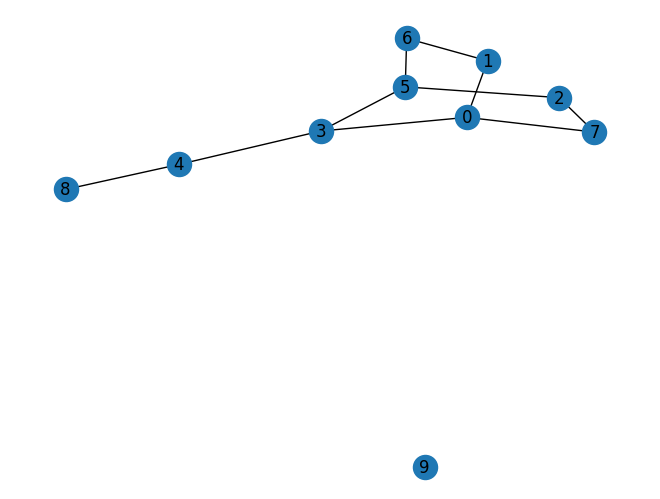

In [15]:
# Example usage
N = 10
D = 2
epsilon = 0.1
G = create_random_graph(N, D, epsilon)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()


In [16]:
from data import graph_to_complex, graph_to_full_complex
import matplotlib.pyplot as plt
import torch
from torch_geometric.utils import from_networkx

In [17]:
def convert_to_pyg_data(G):
    # Convert the NetworkX graph to a PyTorch Geometric Data object
    data = from_networkx(G)
    
    # Adding node features if necessary (e.g., a feature vector of ones)
    # In PyTorch Geometric, each node needs a feature vector, here we use a single feature of 1
    data.x = torch.ones((G.number_of_nodes(), 1))
    
    return data

In [18]:
# fix number of nodes and vary avg degree, plot the number of complex nodes and edges
def complex_vs_avg_degree(N, Ds, epsilon=0.1, max_attempts=1000):
    num_complex_nodes = []
    num_complex_edges = []
    
    num_full_complex_nodes = []
    num_full_complex_edges = []
    
    for D in Ds:
        G = create_random_graph(N, D, epsilon, max_attempts)
        G = convert_to_pyg_data(G)
        complex_graph, _ = graph_to_complex(G)
        complex_graph = complex_graph.to_homogeneous()
        
        print(complex_graph)
        
        num_complex_nodes.append(complex_graph.x.size(0))
        num_complex_edges.append(complex_graph.edge_index.size(1))
        
        full_complex_graph, _ = graph_to_full_complex(G)
        full_complex_graph = full_complex_graph.to_homogeneous()
        
        num_full_complex_nodes.append(full_complex_graph.x.size(0))
        num_full_complex_edges.append(full_complex_graph.edge_index.size(1))

    
    return {
        "complex_nodes": num_complex_nodes,
        "complex_edges": num_complex_edges,
        "full_complex_nodes": num_full_complex_nodes,
        "full_complex_edges": num_full_complex_edges
    }

def complex_vs_num_nodes(Ns, D, epsilon=0.1, max_attempts=1000):
    num_complex_nodes = []
    num_complex_edges = []
    
    num_full_complex_nodes = []
    num_full_complex_edges = []
    
    for N in Ns:
        G = create_random_graph(N, D, epsilon, max_attempts)
        G = convert_to_pyg_data(G)
        complex_graph, _ = graph_to_complex(G)
        complex_graph = complex_graph.to_homogeneous()
        
        num_complex_nodes.append(complex_graph.x.size(0))
        num_complex_edges.append(complex_graph.edge_index.size(1))
        
        full_complex_graph, _ = graph_to_full_complex(G)
        full_complex_graph = full_complex_graph.to_homogeneous()
        
        num_full_complex_nodes.append(full_complex_graph.x.size(0))
        num_full_complex_edges.append(full_complex_graph.edge_index.size(1))
    
    return {
        "complex_nodes": num_complex_nodes,
        "complex_edges": num_complex_edges,
        "full_complex_nodes": num_full_complex_nodes,
        "full_complex_edges": num_full_complex_edges
    }

In [19]:

# plot
N = int(1e4)
Ds = range(1, 11)
results = complex_vs_avg_degree(N, Ds, epsilon=0.5)

Attempt 1: average degree = 1.0122
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 30366], x=[15061, 1], node_type=[15061], edge_type=[30366])
Attempt 1: average degree = 2.0
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 60074], x=[20007, 8], node_type=[20007], edge_type=[60074])
Attempt 1: average degree = 2.9962
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 90188], x=[25008, 8], node_type=[25008], edge_type=[90188])
Attempt 1: average degree = 3.9898
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 120392], x=[30011, 8], node_type=[30011], edge_type=[120392])
Attempt 1: average degree = 5.0196
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 151858], x=[35209, 8], node_type=[35209], edge_type=[151858])
Attempt 1: average degree = 6.0098
Graph generated within tolerance after 1 attempts.
Data(edge_index=[2, 182228], x=[40217, 8], node_type=[40217], edge_type=[182228])
A

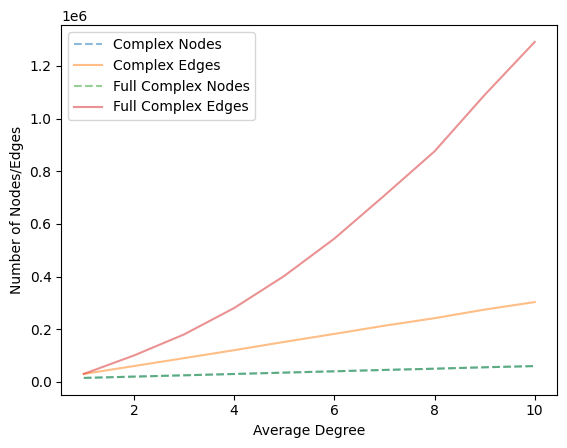

In [22]:
plt.plot(Ds, results["complex_nodes"], label="Complex Nodes", alpha=0.5, linestyle="--")
plt.plot(Ds, results["complex_edges"], label="Complex Edges", alpha=0.5)
plt.plot(Ds, results["full_complex_nodes"], label="Full Complex Nodes", alpha=0.5, linestyle="--")
plt.plot(Ds, results["full_complex_edges"], label="Full Complex Edges", alpha=0.5)

plt.xlabel("Average Degree")
plt.ylabel("Number of Nodes/Edges")
plt.legend()
plt.show()

# save results with N and D as json
import json

with open("complex_vs_avg_degree.json", "w") as f:
    json.dump({
        "N": N,
        "Ds": list(Ds),
        "results": results
    }, f, indent=4)



In [ ]:
# plot number of nodes and edges vs number of nodes
Ns = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
D = 4
results = complex_vs_num_nodes(Ns, D)


Attempt 1: average degree = 4.036
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 3.84
Attempt 2: average degree = 4.024
Graph generated within tolerance after 2 attempts.
Attempt 1: average degree = 3.9066666666666667
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 4.026
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 3.9752
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 4.066666666666666
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 4.036
Graph generated within tolerance after 1 attempts.
Attempt 1: average degree = 3.997
Graph generated within tolerance after 1 attempts.


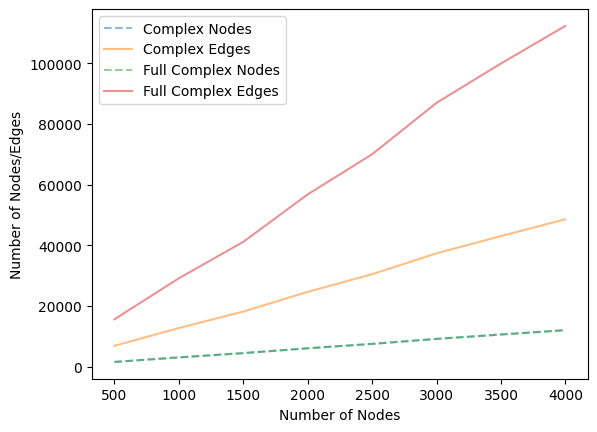

In [ ]:

plt.plot(Ns, results["complex_nodes"], label="Complex Nodes", alpha=0.5, linestyle="--")
plt.plot(Ns, results["complex_edges"], label="Complex Edges", alpha=0.5)
plt.plot(Ns, results["full_complex_nodes"], label="Full Complex Nodes", alpha=0.5, linestyle="--")
plt.plot(Ns, results["full_complex_edges"], label="Full Complex Edges", alpha=0.5)

plt.xlabel("Number of Nodes")
plt.ylabel("Number of Nodes/Edges")
plt.legend()
plt.show()

# save as json
with open("complex_vs_num_nodes.json", "w") as f:
    json.dump({
        "Ns": Ns,
        "D": D,
        "results": results
    }, f, indent=4)